# **Project-2**

In this project, you will analyze and predict the weekly sales for a retail store. The dataset includes weekly sales data for *45* store locations over a *143-week* period. Create a machine learning model (**regression**) to predict weekly sales values using the train and test datasets provided.

**Dataset Details:**

*Store*: Store number

*Week*: 1 through 143

*Temperature*: Weekly outside temperature

*Holiday*: Yes for holiday week, No for non-holiday week

*CPI*: The Consumer Price Index

*Fuel Price*: Price per gallon

*Unemployment*: Unemployment rate

*WeeklySales*: Total sales amount


**Datasets Locations and Names:**
Canvas -> Modules -> Week 5 -> Datasets -> "trainSales.csv" and "testSales.csv".

Download the .ipynb file and save as FirstName_LastName_Project2.ipynb. Please submit (upload) your source code to Canvas.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import All Model Types
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets
from sklearn import preprocessing
from sklearn import metrics

# Pull Dataset
from google.colab import drive
drive.mount('/content/drive')
testSales = pd.read_csv('drive/My Drive/testSales.csv')
trainSales = pd.read_csv('drive/My Drive/trainSales.csv')

Mounted at /content/drive


Print important information about each category

In [2]:
trainSales.info()
trainSales.describe()
trainSales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5148 entries, 0 to 5147
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5148 non-null   int64  
 1   Week          5148 non-null   int64  
 2   Temperature   5148 non-null   float64
 3   Holiday       5148 non-null   object 
 4   CPI           5148 non-null   float64
 5   FuelPrice     5148 non-null   float64
 6   Unemployment  5148 non-null   float64
 7   WeeklySales   5148 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 321.9+ KB


,Store,Week,Temperature,Holiday,CPI,FuelPrice,Unemployment,WeeklySales
0,8,109,50.95,No,224.395979,3.630,5.825,952264.91
1,2,127,84.20,No,221.521506,3.227,6.565,2041507.40
2,38,72,86.84,No,129.043200,3.935,13.736,356797.00
3,41,27,69.21,No,190.099003,2.690,7.335,1338132.72
4,35,125,73.23,No,142.160646,3.564,8.876,911696.00


In [3]:
train = trainSales.drop("WeeklySales", axis=1)
train_labels = trainSales["WeeklySales"].copy()

test = testSales.drop("WeeklySales", axis=1)
test_labels = testSales["WeeklySales"].copy()

num_attribs = ["Temperature", "Unemployment", "Week", "CPI", "FuelPrice"]

cat_attribs = ["Store", "Week", "Holiday"]

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(strategy='median')

my_imputer
#Categorical Features
cat_pipeline = Pipeline([('onehot', OneHotEncoder())])

In [5]:
from sklearn.compose import ColumnTransformer

full_transformer = ColumnTransformer([('cat_preprocessing', cat_pipeline, cat_attribs)])

In [6]:
from sklearn.linear_model import LinearRegression

p1_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                        ('linear_regression', LinearRegression())
                      ])

In [7]:
#For regression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def fit_and_print(p, train_set, train_labels, test_set, test_labels):
  p.fit(train_set, train_labels)
  train_preds = p.predict(train_set)
  test_preds = p.predict(test_set)
  print("Training Error: " + str(mean_absolute_error(train_preds, train_labels)))
  print("Test Error: " + str(mean_absolute_error(test_preds, test_labels)))
  print("R2 score: " + str(r2_score(test_preds, test_labels)))

In [8]:
fit_and_print(p1_full_pipeline, train, train_labels, test, test_labels)

Training Error: 69774.64762785507
Test Error: 67772.4752882658
R2 score: 0.9660964967776687


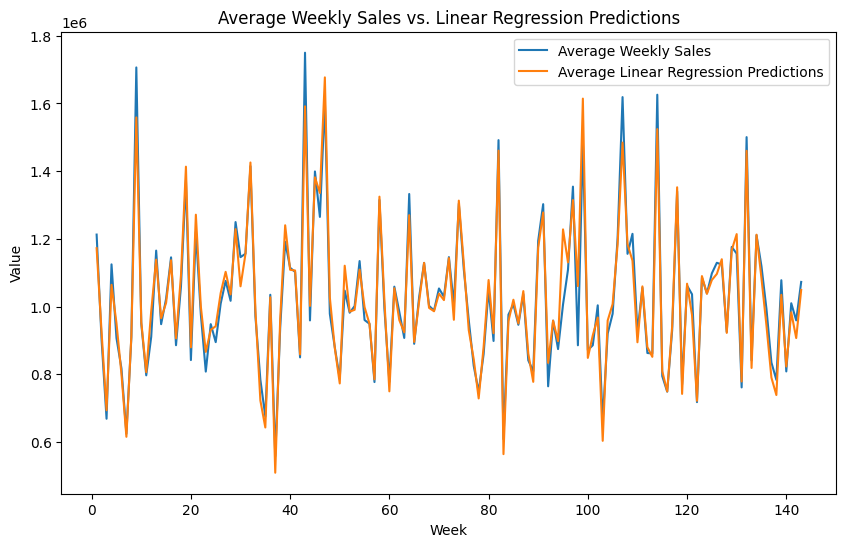

In [9]:
predicted_data = pd.DataFrame({'Week': testSales['Week'], 'Predicted': p1_full_pipeline.predict(testSales)})

# Group by 'Week' and calculate the mean of 'Predicted'
meanPredicted = predicted_data.groupby('Week')['Predicted'].mean()

# Group by 'Week' and calculate the mean of 'WeeklySales'
average_sales = testSales.groupby('Week')['WeeklySales'].mean()

# Create a line plot to visualize the data
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
average_sales.plot(kind='line', label='Average Weekly Sales')
meanPredicted.plot(kind='line', label='Average Linear Regression Predictions')

plt.title('Average Weekly Sales vs. Linear Regression Predictions')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()

plt.show()

Convert Holiday to be a binary amount

In [10]:
# Binary for Training
binaryHoliday = pd.get_dummies(trainSales, columns=['Holiday'])
binaryHoliday = pd.get_dummies(trainSales, columns = ["Holiday"])
trainSales["binHoliday"] = binaryHoliday["Holiday_Yes"]

#Binary for Testing
newBinaryHoliday = pd.get_dummies(testSales, columns=['Holiday'])
newBinaryHoliday = pd.get_dummies(testSales, columns = ["Holiday"])
testSales["binHoliday"] = binaryHoliday["Holiday_Yes"]

Reshape Data

In [11]:
# Reshape Training Data
x = trainSales[['Store', 'Week', 'Temperature', 'binHoliday', 'CPI', 'FuelPrice', 'Unemployment']]
y = trainSales["WeeklySales"]
x, y = np.array(x), np.array(y)

if len(y.shape) == 1:
    y = y.reshape(-1, 1)

# Reshape Testing Data
newX = testSales[['Store', 'Week', 'Temperature', 'binHoliday', 'CPI', 'FuelPrice', 'Unemployment']]
newY = testSales["WeeklySales"]
newX, newY = np.array(newX), np.array(newY)

if len(newY.shape) == 1:
    newY = newY.reshape(-1, 1)

Perform Preproccessing

In [12]:
trainScaler = preprocessing.RobustScaler().fit(x)
testScaler = preprocessing.RobustScaler().fit(newX)

x = trainScaler.transform(x)
newX = testScaler.transform(newX)

# Linear Regression

In [13]:
linearRegression = LinearRegression()

linearRegression.fit(x, y)

yLinearRegression = linearRegression.predict(newX)

print(yLinearRegression)

yLinearRegression = yLinearRegression.flatten()

linearRegressionDifference = pd.DataFrame({'Actual': testSales['WeeklySales'], 'Predicted': yLinearRegression})
linearRegressionDifference.head()

[[ 739323.54297746]
 [ 811915.04743647]
 [1215122.95758366]
 ...
 [1024191.07461152]
 [1139738.87134153]
 [1287853.98682497]]


,Actual,Predicted
0,1217199.39,7.393235e+05
1,616701.99,8.119150e+05
2,1438465.81,1.215123e+06
3,430944.39,8.253321e+05
4,467442.94,7.191690e+05


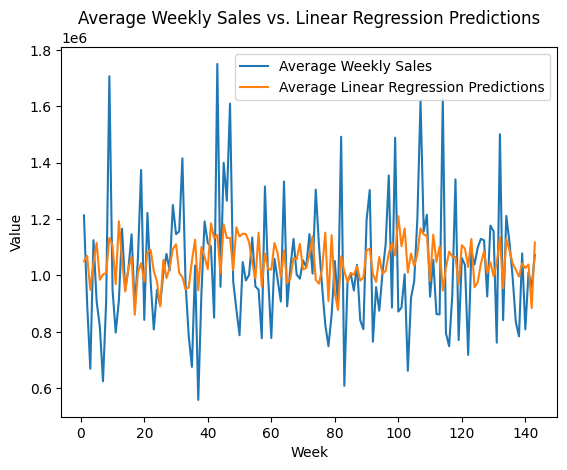

In [14]:
predicted_data = pd.DataFrame({'Week': testSales['Week'], 'Predicted': yLinearRegression})

meanPredicted = predicted_data.groupby('Week')['Predicted'].mean()

average_sales = testSales.groupby('Week')['WeeklySales'].mean()

average_sales.plot(kind='line', label='Average Weekly Sales')
meanPredicted.plot(kind='line', label='Average Linear Regression Predictions')

plt.title('Average Weekly Sales vs. Linear Regression Predictions')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()

plt.show()

This graph shows the difference between the predicted average amount and the actual average amount

In [15]:
meanAbErr = metrics.mean_absolute_error(testSales['WeeklySales'], yLinearRegression)
meanSqErr = metrics.mean_squared_error(testSales['WeeklySales'], yLinearRegression)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(testSales['WeeklySales'], yLinearRegression))
print('R squared: {:.2f}'.format(linearRegression.score(x,y),))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 0.15
Mean Absolute Error: 437884.53463620925
Mean Square Error: 270442157789.83347
Root Mean Square Error: 520040.53475650673


# SGD Regression

In [16]:
sgdRegressor = SGDRegressor(max_iter = 5148, eta0 = 0.1, random_state=42, penalty ="l2", shuffle=True)
sgdRegressor.fit(x, y)

ySDGRegressor = sgdRegressor.predict(newX)

print(ySDGRegressor)

sdgRegressorDifference = pd.DataFrame({'Actual': testSales['WeeklySales'], 'Predicted': ySDGRegressor})
sdgRegressorDifference.head()

[ 780407.9370969   784648.87983084 1239655.38526449 ... 1031610.27234211
 1116326.27944052 1302871.32389338]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Actual,Predicted
0,1217199.39,7.804079e+05
1,616701.99,7.846489e+05
2,1438465.81,1.239655e+06
3,430944.39,7.205260e+05
4,467442.94,7.339371e+05


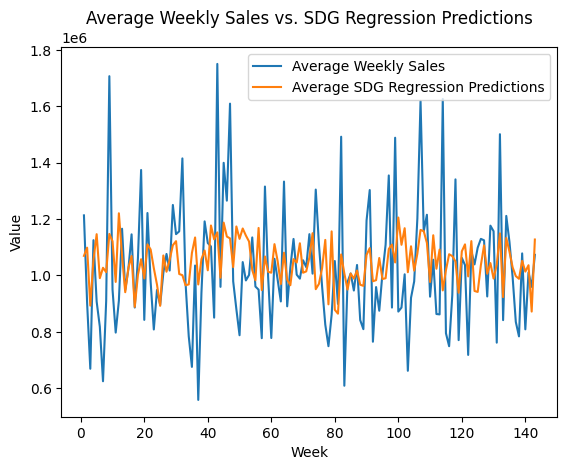

In [17]:
predicted_data = pd.DataFrame({'Week': testSales['Week'], 'Predicted': ySDGRegressor})

meanPredicted = predicted_data.groupby('Week')['Predicted'].mean()

average_sales = testSales.groupby('Week')['WeeklySales'].mean()

average_sales.plot(kind='line', label='Average Weekly Sales')
meanPredicted.plot(kind='line', label='Average SDG Regression Predictions')

plt.title('Average Weekly Sales vs. SDG Regression Predictions')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()

plt.show()

This graph shows the difference between the predicted average amount and the actual average amount

In [18]:
meanAbErr = metrics.mean_absolute_error(testSales['WeeklySales'], ySDGRegressor)
meanSqErr = metrics.mean_squared_error(testSales['WeeklySales'], ySDGRegressor)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(testSales['WeeklySales'], ySDGRegressor))
print('R squared: {:.2f}'.format(sgdRegressor.score(x,y),))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 0.14
Mean Absolute Error: 438542.1118779528
Mean Square Error: 274191076142.0865
Root Mean Square Error: 523632.5774262775


## Polynomial Regression

In [19]:
poly_features = PolynomialFeatures(degree = 2, include_bias=False)
polyX = poly_features.fit_transform(x)
x[1]
polyX[1]

polyRegression = LinearRegression()
polyRegression.fit(x, y)

yPolyRegression = polyRegression.predict(newX)

print(yPolyRegression)

yPolyRegression = yPolyRegression.flatten()

polyRegressionDifference = pd.DataFrame({'Actual': testSales['WeeklySales'], 'Predicted': yPolyRegression})
polyRegressionDifference.head()

[[ 739323.54297746]
 [ 811915.04743647]
 [1215122.95758366]
 ...
 [1024191.07461152]
 [1139738.87134153]
 [1287853.98682497]]


,Actual,Predicted
0,1217199.39,7.393235e+05
1,616701.99,8.119150e+05
2,1438465.81,1.215123e+06
3,430944.39,8.253321e+05
4,467442.94,7.191690e+05


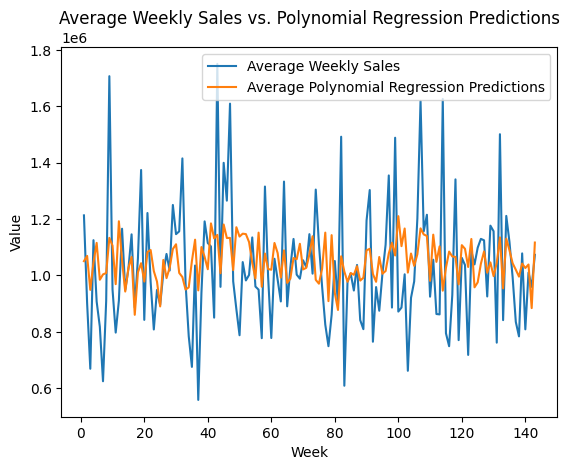

In [20]:
predicted_data = pd.DataFrame({'Week': testSales['Week'], 'Predicted': yPolyRegression})

meanPredicted = predicted_data.groupby('Week')['Predicted'].mean()

average_sales = testSales.groupby('Week')['WeeklySales'].mean()

average_sales.plot(kind='line', label='Average Weekly Sales')
meanPredicted.plot(kind='line', label='Average Polynomial Regression Predictions')

plt.title('Average Weekly Sales vs. Polynomial Regression Predictions')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()

plt.show()

This graph shows the difference between the predicted average amount and the actual average amount

In [21]:
meanAbErr = metrics.mean_absolute_error(testSales['WeeklySales'], yPolyRegression)
meanSqErr = metrics.mean_squared_error(testSales['WeeklySales'], yPolyRegression)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(testSales['WeeklySales'], yPolyRegression))
print('R squared: {:.2f}'.format(polyRegression.score(x,y),))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 0.15
Mean Absolute Error: 437884.53463620925
Mean Square Error: 270442157789.83347
Root Mean Square Error: 520040.53475650673
